<a href="https://colab.research.google.com/github/rebeccalizaverghese/IBM-Data-Science/blob/main/8.3_Data_Visualization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Advanced Visualization and Geospatial Data**


In [12]:
# Import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts
import numpy as np
import pandas as pd # primary data structure library
from PIL import Image # converts images to arrays
import seaborn as sns
import wordcloud
print ('Matplotlib version: ', mpl.__version__)
print('Seaborn version: ', sns.__version__)
print('WordCloud version: ', wordcloud.__version__)

Matplotlib version:  3.7.1
Seaborn version:  0.13.2
WordCloud version:  1.9.3


In [13]:
# Fetch Data
df =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [14]:
# print dimensions of the dataframe
print("dimensions = ", df.shape)
print("where rows = ", df.shape[0], "& columns = ", df.shape[1])

dimensions =  (195, 39)
where rows =  195 & columns =  39


In [15]:
# set country as index
df.set_index('Country', inplace=True)

#### **Waffle Chart**
Waffle Charts are a visualization technique that represent categorical data in the form of square tiles or cells. They resemble a grid of equal-sized squares with each square representing  a specific value or category

The size or color of the squares indicate the magnitude or proportion of each category. They effectively show the proportion or percentage of different categories within an overall composition.

The grid-like structure of waffle charts make it easy to understand and interpret data even for non-technical audiences.


In [16]:
df_dsn = df.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [17]:
# Waffle charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.
# The first step into creating a waffle chart is determing the proportion of each category with respect to the total.
## compute the proportion of each category with respect to the total
total_values = df_dsn['Total'].sum()
categorical_proportions = df_dsn['Total']/ total_values

## print the proportions
pd.DataFrame({"Category Proportion": categorical_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [18]:
# The second step is defining the overall size of the waffle chart.
width = 40 # width of chart
height = 10 # height of chart
total_num_tiles = width*height
print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


In [19]:
# The third step is using the proportion of each category to determe it respective number of tiles
## Compute no. of tiles for each category
tiles_per_category = (categorical_proportions*total_num_tiles).round().astype(int)
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


Based on the calculated proportions, Denmark will occupy 129 tiles of the waffle chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.

In [20]:
#  The fourth step is creating a matrix that resembles the waffle chart and populating it.
## initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1

        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

In [21]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

The matrix consists of three categories and the total number of each category's instances matches the total number of tiles allocated to each category.

<Figure size 640x480 with 0 Axes>

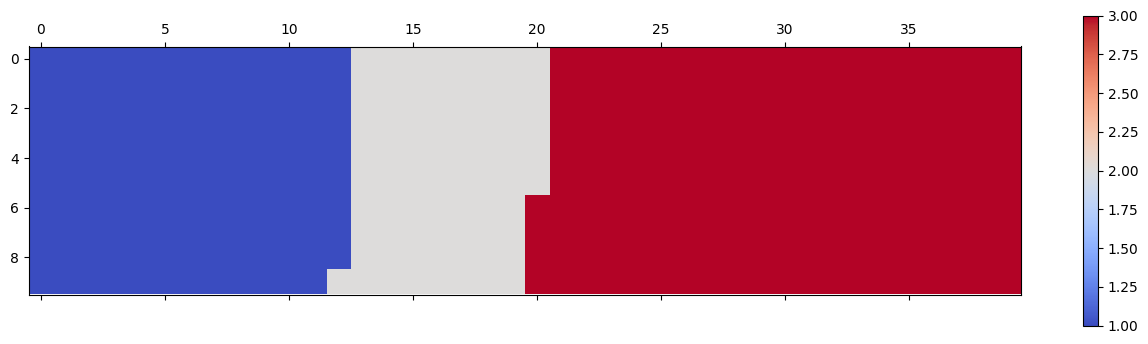

In [22]:
# map the waffle chart matrix into a visual
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 640x480 with 0 Axes>

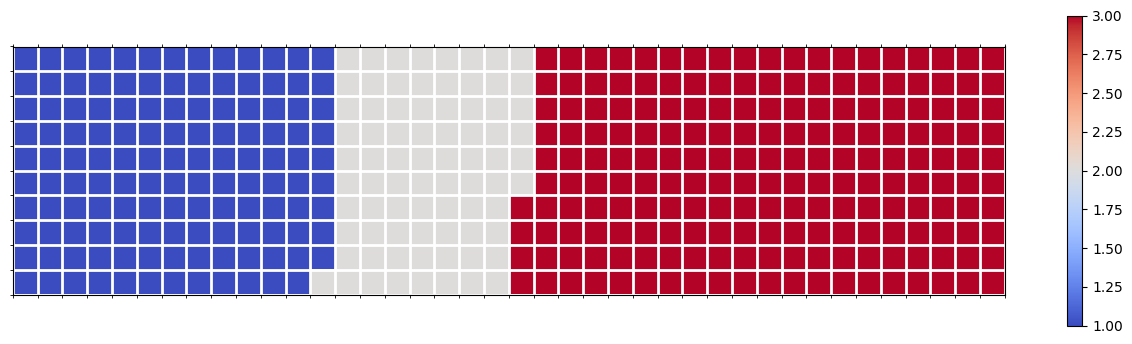

<ipython-input-23-8e46c24c5864>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
<ipython-input-23-8e46c24c5864>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
<ipython-input-23-8e46c24c5864>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_val = colormap(float(values_cumsum[i])/total_values)


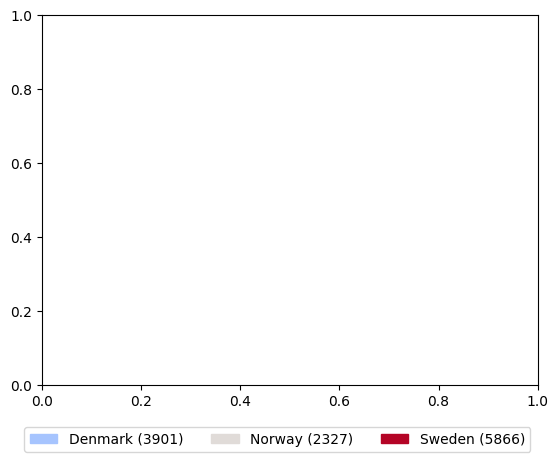

In [23]:
# prettify the chart
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

#### Creating Waffle Chart using Pywaffle

In [24]:
# Install and import pywaffle
!pip install pywaffle
import pywaffle
from pywaffle import Waffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 64.8 MB/s eta 0:00:00


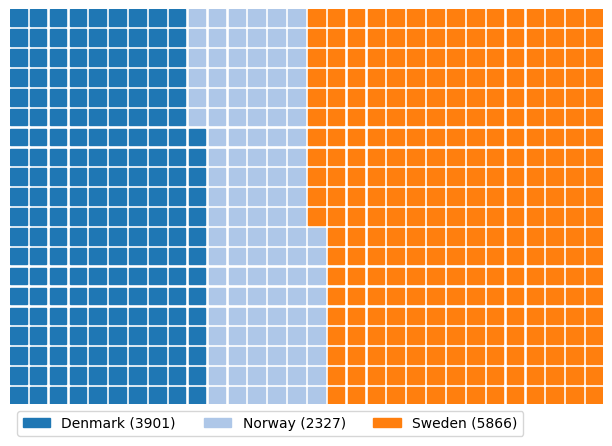

In [25]:
# Set up waffle chart figure
fig = plt.figure(FigureClass=Waffle,
                 rows=20, columns=30,
                 values=df_dsn['Total'],
                 cmap_name='tab20', # color scheme
                 legend={'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values, df_dsn.Total)],
                         'loc':'lower left', 'bbox_to_anchor':(0,-0.1), 'ncol':3 })
plt.show()

### **Word Cloud**
Word/ Tag/ Text Cloud is a popular data visualization method to visually present textual data in an engaging and informative manner. It presents a concise summery of the textual content by providing a visual overview of the most commonly used words within a given text or collection of documents
It is simply a depiction of importance of different words in a body of text. It works in a simple way, a word appears bigger and bolder in the word cloud depending on how many times it appears in a source of textual data.

In [29]:
from wordcloud import WordCloud, STOPWORDS

In [30]:
# Analyze a short novel written by Lewis Carroll titled Alice's Adventures in Wonderland.
import urllib
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [31]:
# use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.
stopwords = set(STOPWORDS)

In [32]:
# Instantiate a wordcloud object
alice_wc = WordCloud()
# generate the word cloud
alice_wc.generate(alice_novel)

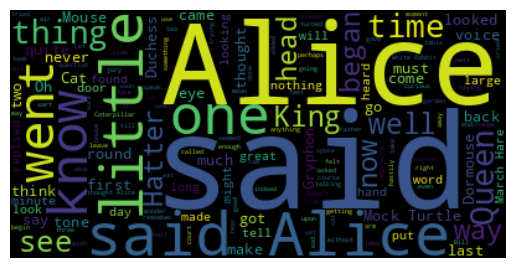

In [33]:
# Display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

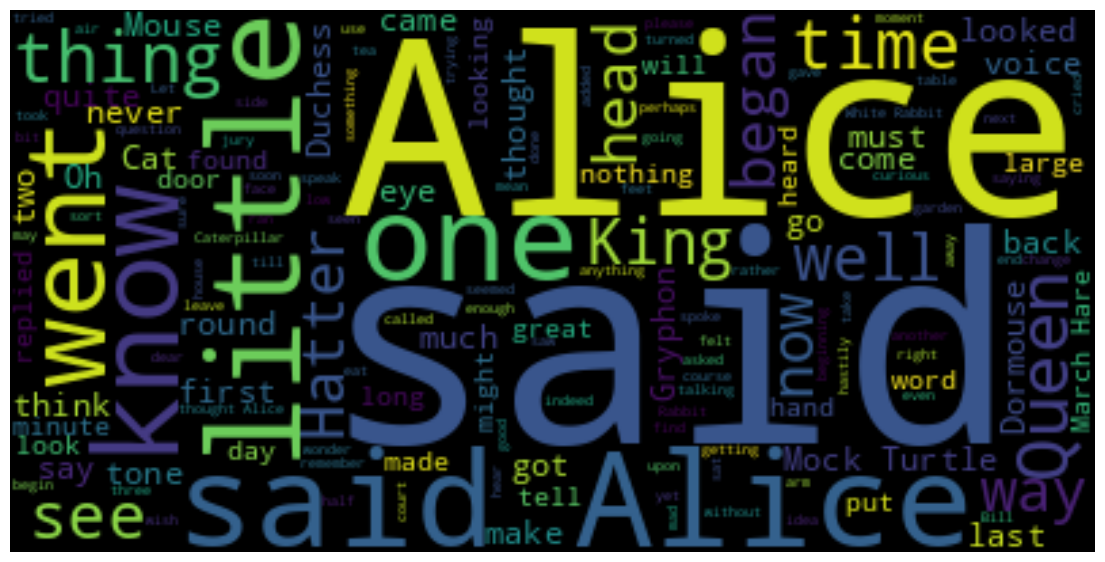

In [34]:
fig = plt.figure(figsize=(14, 18))

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

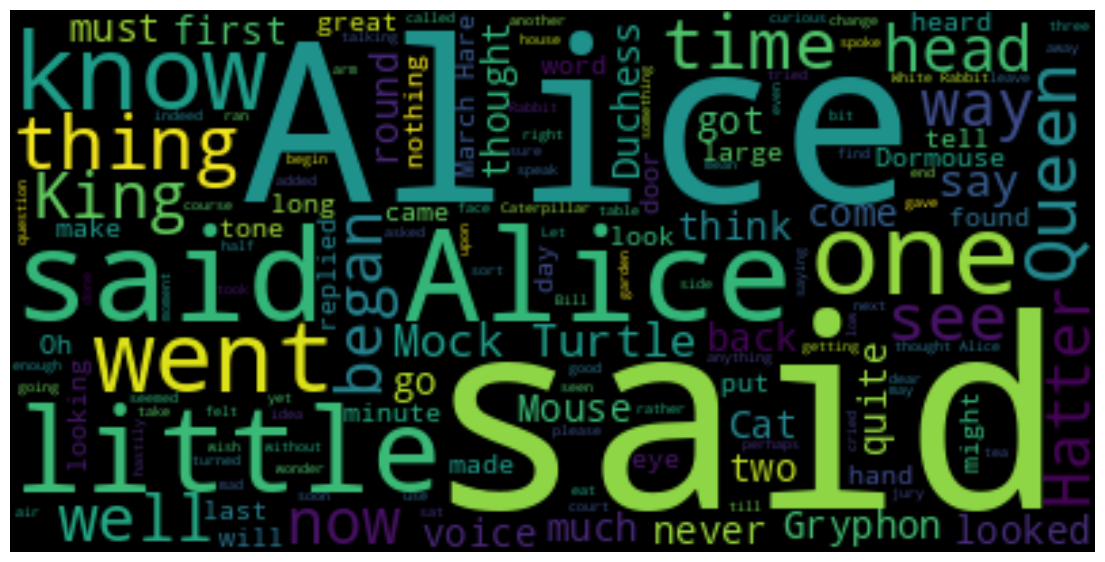

In [36]:
# said isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.
stopwords.add('said')
# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Another cool thing you can implement with the word_cloud package is superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit. We already created the mask for you, so let's go ahead and download it and call it alice_mask.png.

In [37]:
#save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

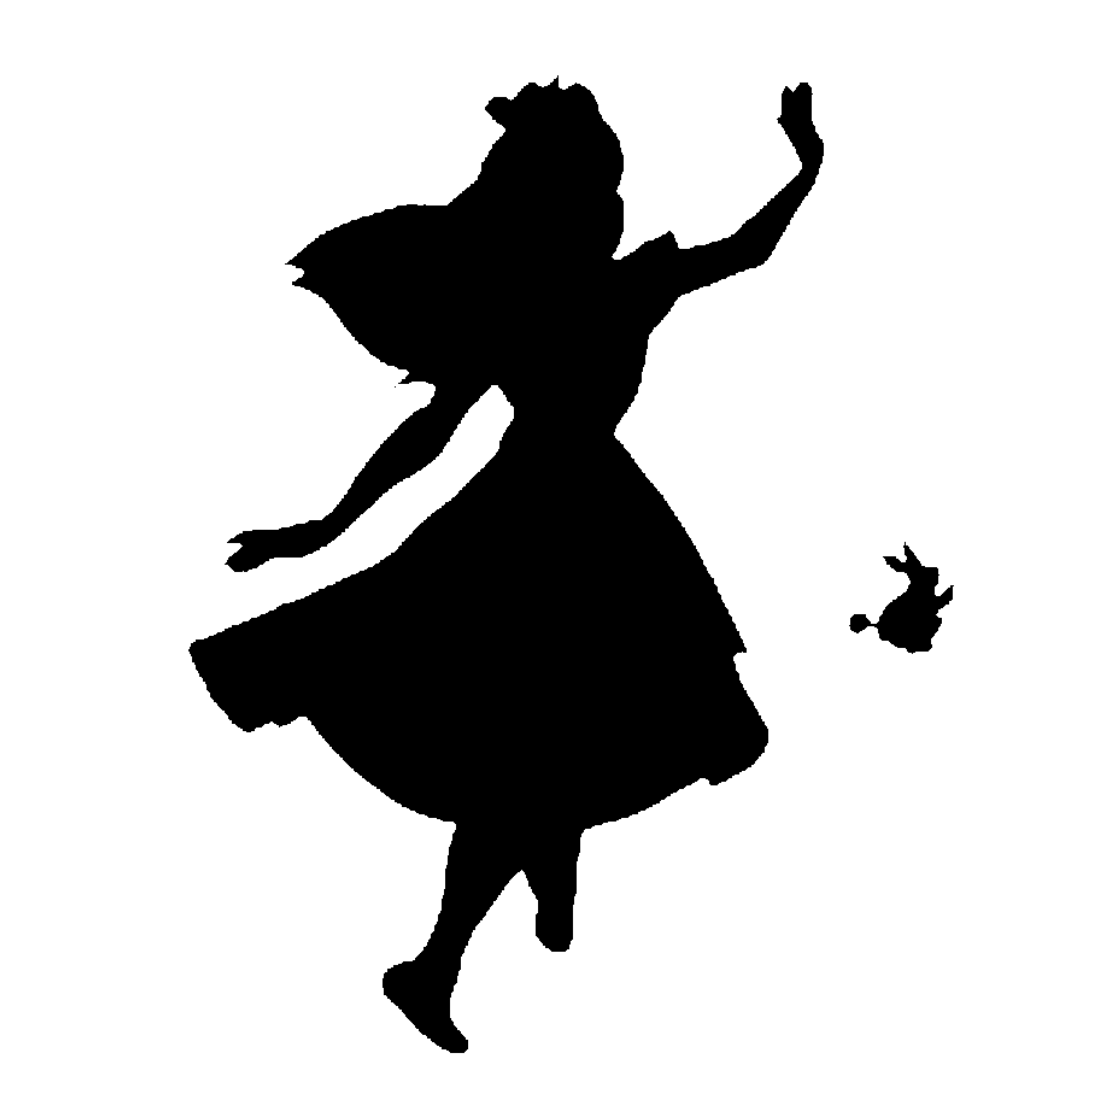

In [38]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

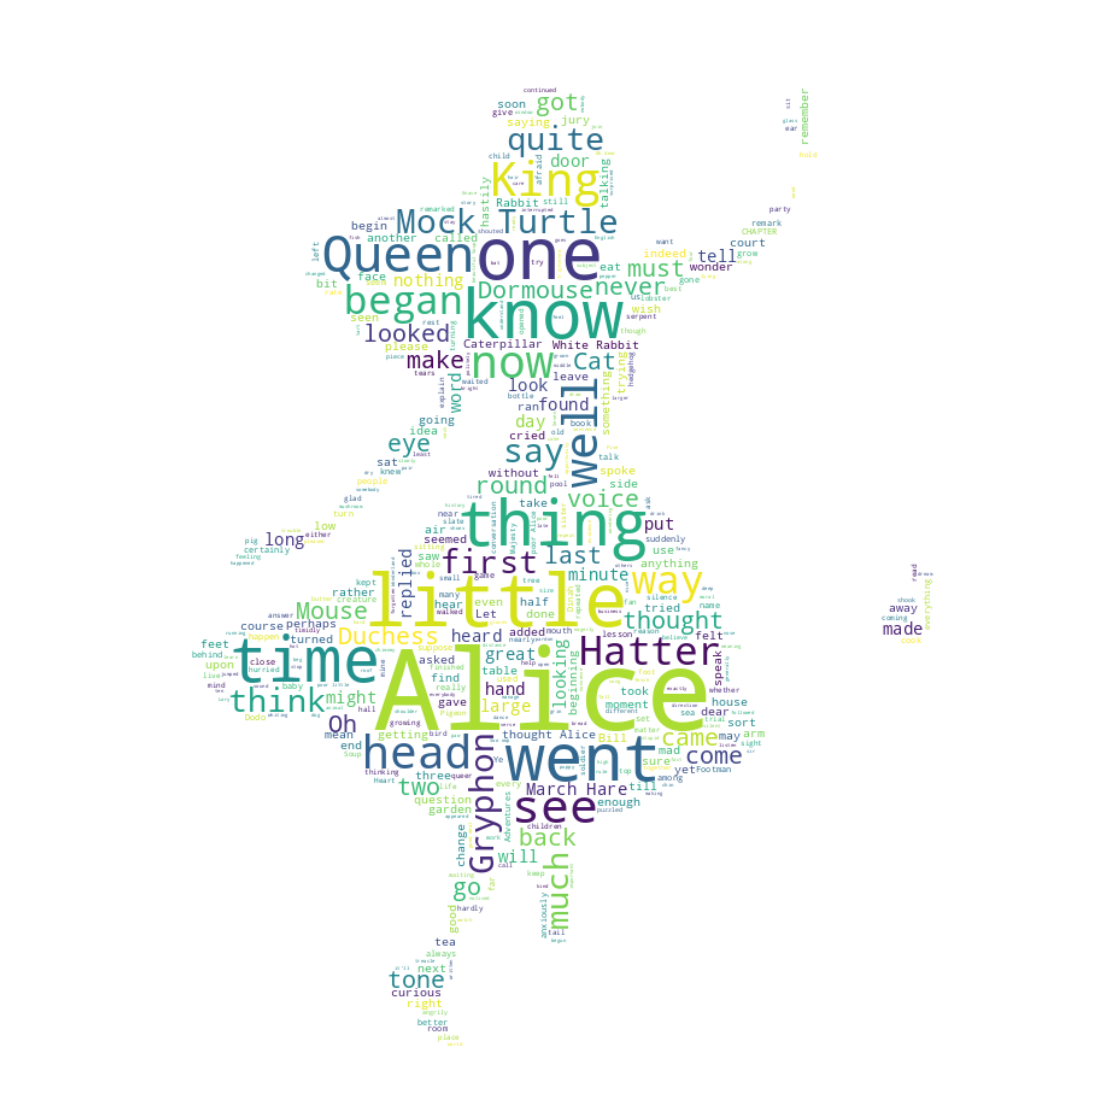

In [39]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### **Plotting with Seaborn**
##### **Catagorical Plots**
countplot
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

In [40]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

<Axes: xlabel='Continent', ylabel='count'>

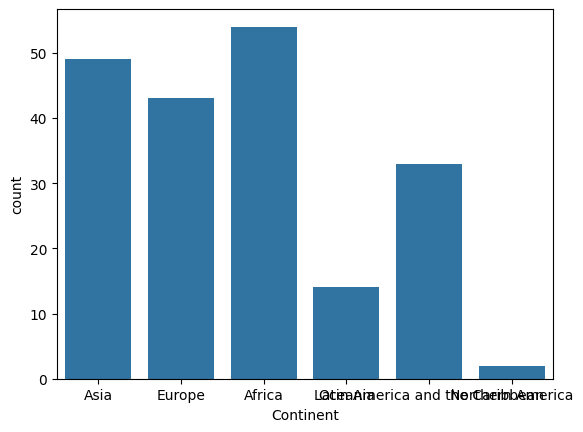

In [42]:
sns.countplot(x='Continent', data=df)

In [44]:
df1 = df.replace('Latin America and the Caribbean', 'L-America')
df1 = df1.replace('Northern America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

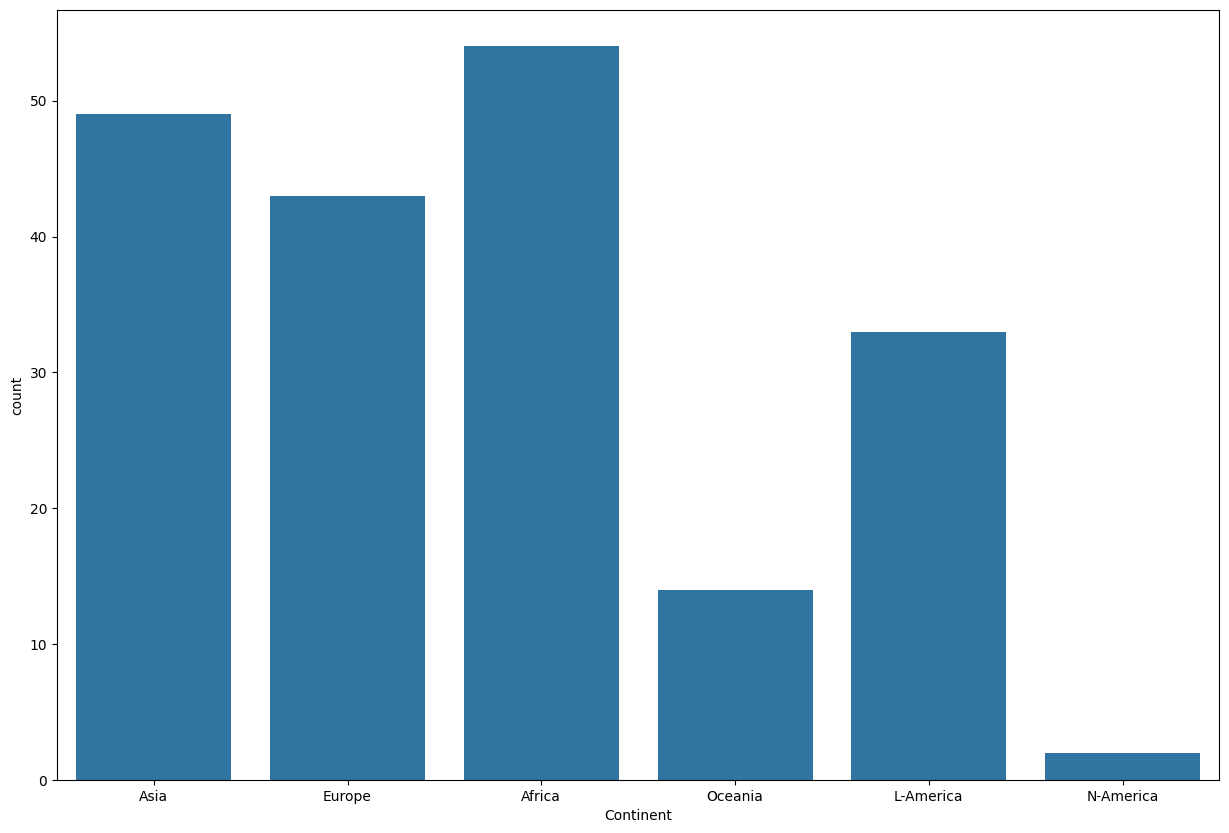

In [49]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Continent', data=df1)

##### **Bar Plot**
This plot will perform the Groupby on a categorical varaible and plot aggregated values, with confidence intervals.

<Axes: xlabel='Continent', ylabel='Total'>

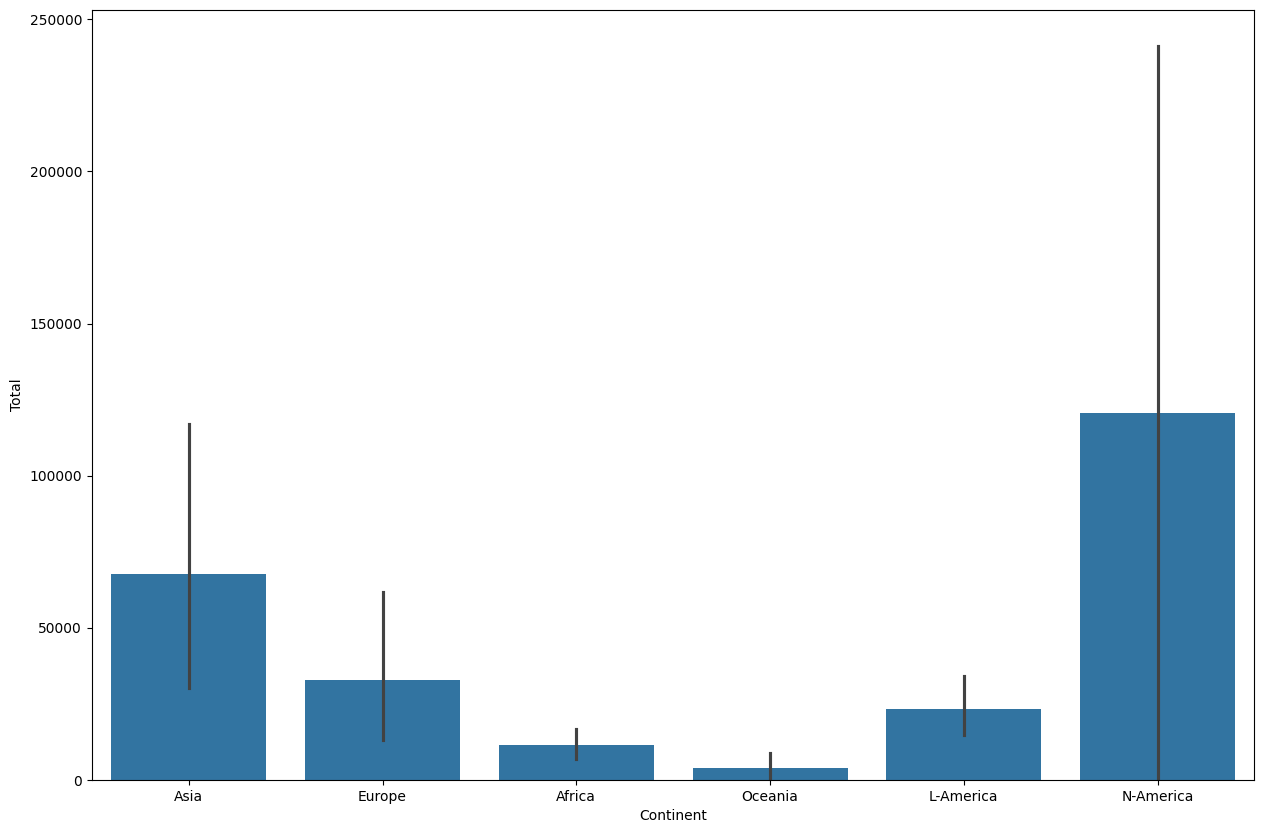

In [51]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Continent', y='Total', data=df1)

In [52]:
df2=df1.groupby('Continent')['Total'].mean()
df2

,Total
Continent,
Africa,11462.000000
Asia,67710.081633
Europe,32812.720930
L-America,23186.303030
N-America,120571.000000
Oceania,3941.000000


##### **Regression Plot**
With seaborn, generating a regression plot is as simple as calling the regplot function.

In [53]:
years = list(map(str, range(1980, 2014)))
df_tot = pd.DataFrame(df[years].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

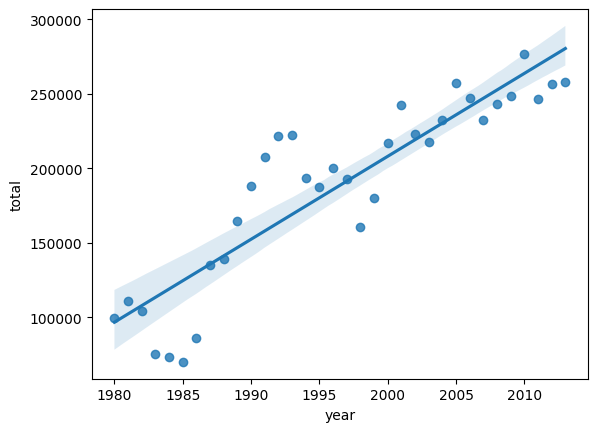

In [54]:
sns.regplot(x='year', y='total', data=df_tot)

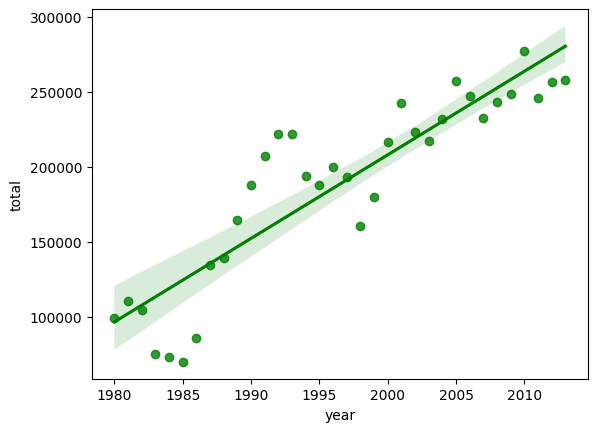

In [55]:
# change color to green
sns.regplot(x='year', y='total', data=df_tot, color='green')
plt.show()

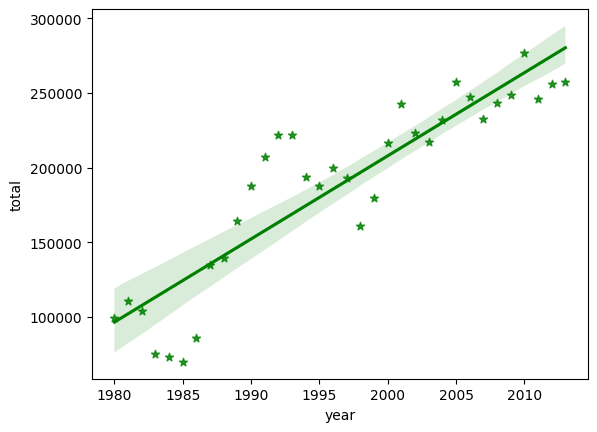

In [56]:
# change marker shape from circular to star
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='*')
plt.show()

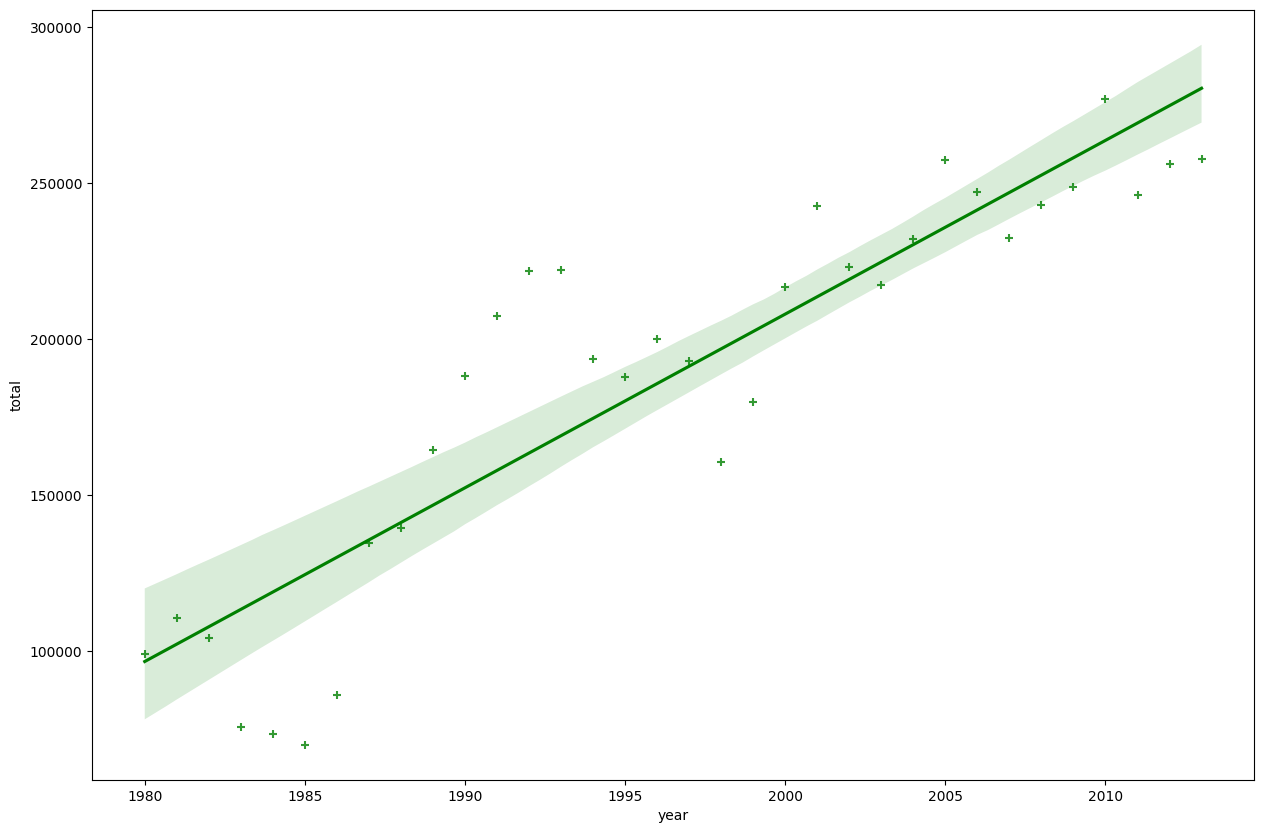

In [57]:
#  blow up the plot a little so that it is more appealing to the sight.
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

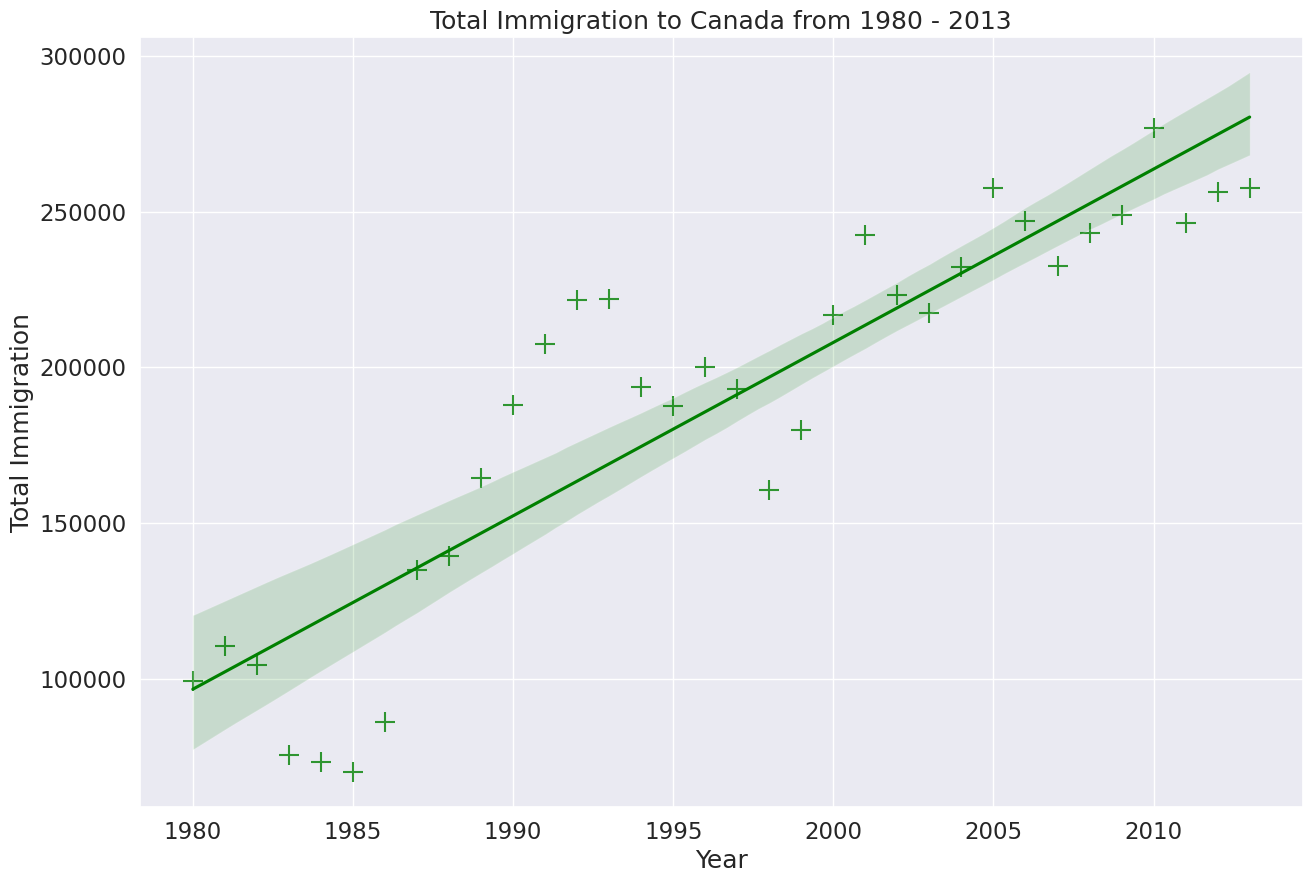

In [58]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

### **Visualizing Geospatial Data**
**Folium** is a powerful data visualization library in python that was built primarily to help people visualize geospatial data, with which, you can create a map of any location in the world using latitude and longitude values.

You can also create a map and superimpose markers and clusters on top of the map for interesting visualizations as well as create maps of different styles (street-level maps, stamen maps, and a couple of others)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import folium
print('Folium is installed and imported')

Folium is installed and imported


In [2]:
# create a folium map object
world_map = folium.Map()
world_map

In [4]:
# define world map of specific location
world_map = folium.Map(location=[23.4241, 53.8478], zoom_start=4)
print("UAE Map")
world_map

UAE Map


In [6]:
# define the world map centered around Canada with a higher zoom level
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=8)
worldmap

In [7]:
# Create a map of Mexico with a zoom level of 4
world_map = folium.Map(location=[23.6345, 102.5528], zoom_state=4)
world_map

**Map Styles**:- Folium allows us to create maps of different styles using the tiles parameter.

A) Cartodb dark_matter Maps - These are high-contrast B+W (black and white) maps. They are perfect for data mashups and exploring river meanders and coastal zones.

In [8]:
# create a Cartodb dark_matter map of canada with a zoom level of 4
world_map = folium.Map(location=[56.130, -106.35], zoom_state=4, tiles='Cartodb dark_matter')
world_map

B) Cartodb positron Maps - CartoDB Positron maps are designed with a light and minimalistic aesthetic. They have a white or light-colored background and feature simple, clean lines for map elements. These maps are known for their modern and visually appealing design.

In [9]:
world_map = folium.Map(location=[56.130, -106.35], zoom_state=4, tiles='Cartodb positron')
world_map

**Markers** -
Markers play a vital role in enhancing interactivity and adding context to the maps. They represent specific location or points of interest, providing additional information when clicked. They are like sign posts that guide us through the map, highlighting important elements.

In [10]:
df_incidents = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [11]:
df_incidents.shape

(150500, 13)

In [13]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]
df_incidents.shape

(100, 13)

In [14]:
# visualize where these crimes took place in the city of San Francisco.
latitude = 37.77
longitude = -122.42
sanfran_map = folium.Map(location=[latitude, longitude],zoom_start=12)
sanfran_map

In [15]:
# Let's superimpose the locations of the crimes onto the map by creating a feature group with it's own fetures and style and adding that to sanfran_maps
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
  incidents.add_child(
      folium.vector_layers.CircleMarker(
          [lat, lng],
          radius=5, # defines how big you want the circle markers to be
          color='yellow',
          fill=True,
          fill_color='blue',
          fill_opacity=0.6))

# add incident to map
sanfran_map.add_child(incidents)


We can also add some pop-up text that would get displayed when you hover over a marker. Let's make each marker display the category of the crime when hovered over

In [16]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
  incidents.add_child(
      folium.vector_layers.CircleMarker(
          [lat, lng],
          radius=5,
          color='yellow',
          fill=True,
          fill_color='blue',
          fill_opacity=0.6))

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
  folium.Marker([lat,lng], popup=label).add_to(sanfran_map)

sanfran_map.add_child(incidents)

In [17]:
# We can make the maps appear less congested by removing the location markers and just adding text to the circle markers themselves
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [18]:
# We can also remedy it by grouping the markers into different clusters such that each cluster is then represented by the number of crimes in each neighbourhood.
from folium import plugins
# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

Observation - When you zoom out all the way, all markers are grouped into one cluster, the global cluster, of 100 markers or crimes, which is the total number of crimes in our dataframe. Once you start zooming in, the global cluster will start breaking up into smaller clusters. Zooming in all the way will result in individual markers.

#### **Chorpleth Maps**
A Choropleth map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area, or it shows the level of variability within a region.

In [19]:
# create a Choropleth map of the world depicting immigration from various countries to Canada.
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [20]:
# download countries geojson file
! wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json

In [26]:
world_geo = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json' # geojson file
# create plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

In [32]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
folium.Choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada').add_to(world_map)

world_map

Observation - As per our Choropleth map legend, the darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. Accordingly, the highest immigration over the course of 33 years (from 1980 to 2013) was from China, India, and the Philippines, followed by Poland, Pakistan, and interestingly, the US.